In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec
import glob
import netCDF4 as ncdf

import time

from datetime import datetime

# Local import 

from spectra.py_spectra import *

# Two levels that are used to create mean analysis

analysis_levels  = [6,17,28]


In [81]:
#-----------------------------------------------------------------
#
# This code can run and plot power spectra from a single day
#

def run_spectral_analysis(in_dir, out_dir, day, suffix_name = ["HRRR_ECONUS", "RRFS_ECONUS"], analysis_levels = [4, 34]):
    

    hrrr_file = str(os.path.join(in_dir, "%s_%s.nc" % (day, suffix_name[0])))
    rrfs_file = str(os.path.join(in_dir, "%s_%s.nc" % (day, suffix_name[1])))
    
    print(hrrr_file)
    print(rrfs_file)
    
    # Open data sets

    hrrr = xr.open_dataset(hrrr_file) 
    rrfs = xr.open_dataset(rrfs_file)
    
    zlevels = hrrr.z
    
    # Loop over the analy_klevels to create multiple plots

    for k in analysis_levels:

        # these three levels are averaged together

        klevels = [k-1, k, k+1]

        # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

        hrrr_u = np.nan_to_num(hrrr.u_interp.isel(nz=klevels).values).astype('float64')
        hrrr_v = np.nan_to_num(hrrr.v_interp.isel(nz=klevels).values).astype('float64')
        hrrr_w = np.nan_to_num(hrrr.w_interp.isel(nz=klevels).values).astype('float64')

        rrfs_u = np.nan_to_num(rrfs.u_interp.isel(nz=klevels).values).astype('float64')
        rrfs_v = np.nan_to_num(rrfs.v_interp.isel(nz=klevels).values).astype('float64')
        rrfs_w = np.nan_to_num(rrfs.w_interp.isel(nz=klevels).values).astype('float64')

        # Compute spectra...

        fig = plt.figure(constrained_layout=True,figsize=(20,10))

        ylim    = [0.1,1.0e4]
        axis    = 0
        func    = get_spectra2D_RAD
        PSonly  = True
        detrend = True

        gs = gridspec.GridSpec(1, 2, figure=fig)

        ax1 = fig.add_subplot(gs[0, 0])

        plot_spectra(rrfs_w, func=func, axis=axis, ax=[ax1], detrend=detrend, legend='', PScolor='r', ylim=ylim, LinsborgSlope=False, PSonly=PSonly)       
        plot_spectra(hrrr_w, func=func, axis=axis, ax=[ax1], detrend=detrend, legend='NEW HRRR:black\nNEw RRFSB:red', ptitle = 'W', ylim=ylim, PSonly=PSonly)
            
        ax1 = fig.add_subplot(gs[0, 1])
        ylim = [1.0e1,1.0e7]

        plot_spectra(rrfs_u, varray=rrfs_v, func=func, axis=axis, ax=[ax1], detrend=detrend, legend='', PScolor='r', ylim=ylim, LinsborgSlope=True, PSonly=PSonly)
        plot_spectra(hrrr_u, varray=hrrr_v, func=func, axis=axis, ax=[ax1], detrend=detrend, legend='HRRR:black\nRRFSB:red', ptitle = 'Hor. KE', ylim=ylim, PSonly=PSonly)

        plt.suptitle("W-Spectra Avg Case Day %s \n Height Level: %3.1f km" % (day, zlevels[k]/1000.), fontsize=20)

        plt.savefig("%s/%s_%s_%3.1fkm.png" % (out_dir, day, 'W_KE_Spectra', zlevels[k]/1000.),bbox_inches='tight', dpi=300)


In [ ]:
in_dir  = "/work/wicker/ECONUS"
out_dir = "/work/wicker/CAM_analysis_tools/2022_spectra"
case_days = ["2022050400",
            "2022051200",
            "2022051400",
            "2022051500",
            "2022051900",
            "2022052300",
            "2022052400",
            "2022052700",
            "2022053000",
            "2022060700"]

case_days = ["2022060700"]

for d in case_days:
    print("Running day:  %s\n" % d)
    ret = run_spectral_analysis(in_dir, out_dir, d)
    

Running day:  2022060700

/work/wicker/ECONUS/2022060700_HRRR_ECONUS.nc
/work/wicker/ECONUS/2022060700_RRFS_ECONUS.nc
----------------------------------------------------------------------------------------------------
plot_spectra: Computing power spectrum using function: get_spectra2D_RAD
plot_spectra: Spectrum from a single variable
plot_spectra: DETREND = True

          ----------------------------------------------------------------------------------------------------
          get_spectraND: Reshaped array so that spectra averaged over outer dimension: 33

                    ----------------------------------------------------------------------------------------------------
                    get_spectra2D_RAD is now being called
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling detrend
Calling det


====> Begin processing runs


----> Processing run: HRRR for day:  2022050400 

          /work/wicker/ECONUS/2022050400_HRRR_ECONUS.nc

          ----------------------------------------------------------------------------------------------------
          get_spectraND: Reshaped array so that spectra averaged over outer dimension: 18

                    ----------------------------------------------------------------------------------------------------
                    get_spectra2D_RAD



----> Processing run: RRFS for day:  2022050400 

          /work/wicker/ECONUS/2022050400_RRFS_ECONUS.nc

          ----------------------------------------------------------------------------------------------------
          get_spectraND: Reshaped array so that spectra averaged over outer dimension: 18

                    ----------------------------------------------------------------------------------------------------
                    get_spectra2D_RAD



----> Processing run: HRRR 

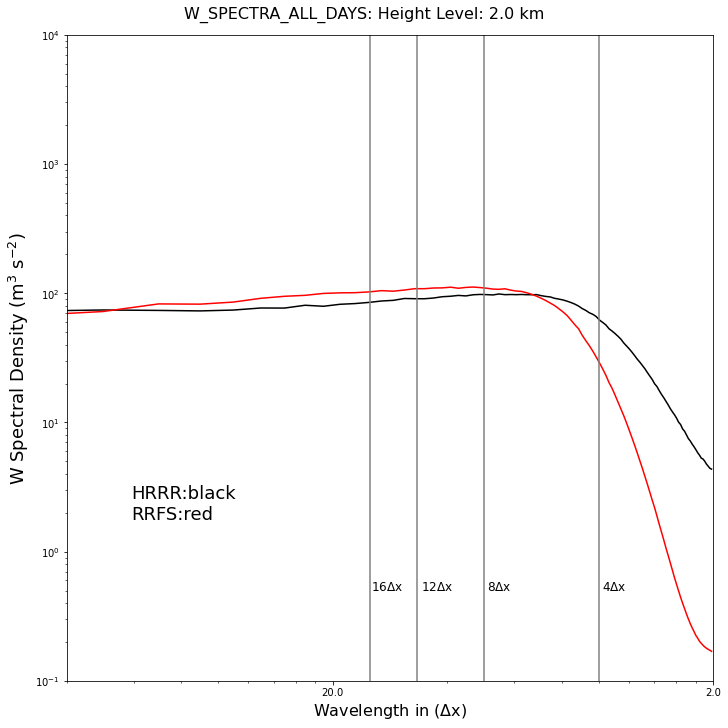

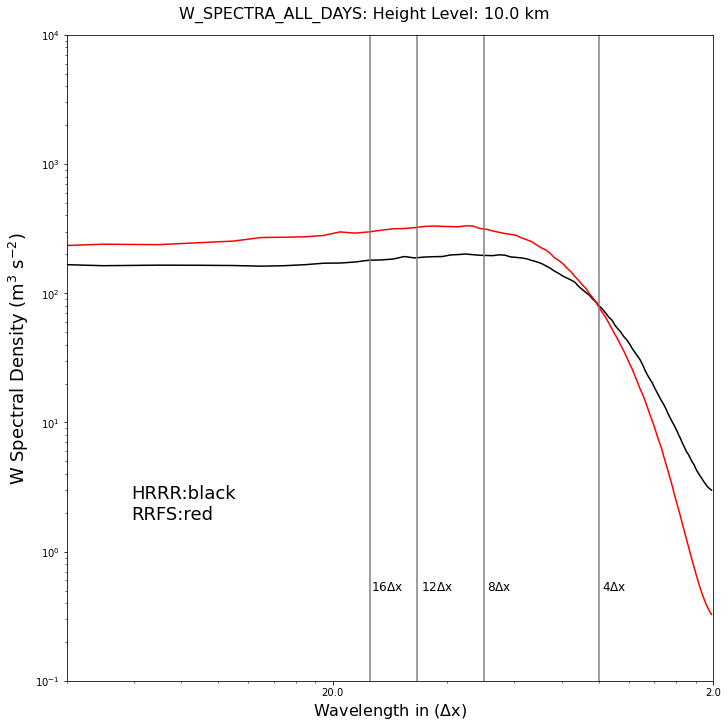

In [78]:
import matplotlib.ticker as mticker

analysis_levels  = [4, 34]

def update_ticks(x, pos):
    if x != 0.0:
        return "%2.1f" % (2.0/x)
    else:
        return r'$\infty$'

in_dir  = "/work/wicker/ECONUS"
out_dir = "/work/wicker/CAM_analysis_tools/2022_spectra"
case_days = ["2022050400",
            "2022051200",
            "2022051400",
            "2022051500",
            "2022051900",
            "2022052300",
            "2022052400",
            "2022052700",
            "2022053000",
            "2022060700"]

ncases = len(case_days)

avg_grid = 0.005 + 0.985* np.linspace(0.0, 1.0, num=100, endpoint=True)

ret_data =  {"HRRR":[], 
             "RRFS":[]}

avg_data = {"HRRR":np.zeros((ncases,avg_grid.shape[0],)), 
            "RRFS":np.zeros((ncases,avg_grid.shape[0],))}

func = get_spectra2D_RAD
dtrend = False
axis = None

delta = False

suffix_names = ["HRRR","RRFS"]
region = "ECONUS"
#------------------------------------------------------------------------------------
#

print("\n====> Begin processing runs\n")

for k in analysis_levels:
    for n, day in enumerate(case_days):
        for run in suffix_names:

            print("\n----> Processing run: %s for day:  %s \n" % (run, day))
            
            myfile  = str(os.path.join(in_dir, "%s_%s_%s.nc" % (day, run, region)))
            print("          %s\n" % myfile)

            # Open data set

            data = xr.open_dataset(myfile)
            
            zlevels = data.z
            
            # Loop over the analy_klevels to create multiple plots

            # these five levels are averaged together

            klevels = [k-1, k, k+1]

            # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

            data_w = np.nan_to_num(data.w_interp.isel(nz=klevels).values).astype('float64')

            # Compute spectra...

            ret = get_spectraND(data_w, func = func, dtrend = dtrend)

            ret_data[run].append(ret)

            avg_data[run][n][:] = np.interp(avg_grid, ret[2], ret[1])
            
            data.close()


# Now post the runs....

    legend='HRRR:black\nRRFS:red'

    avg_hrrr = avg_data['HRRR'].mean(axis=0)
    avg_rrfs = avg_data['RRFS'].mean(axis=0)

    fig, axes = plt.subplots(1, 1, constrained_layout=True,figsize=(10,10))

    if delta:
        delta_rrfs = avg_rrfs[12]-avg_hrrr[12]
        axes.loglog(avg_grid, avg_hrrr+delta_rrfs,  color='black')
    else:
        axes.loglog(avg_grid, avg_hrrr,  color='black')
        
    axes.loglog(avg_grid, avg_rrfs, color='red')
    
    axes.set_xlim(2.0/avg_grid.shape[0], 1.0)

    axes.annotate("%s" % legend, xy=(0.10, 0.25), xycoords='axes fraction', color='k',fontsize=18)
    axes.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

    ylim    = [0.1,1.0e4]
        
    axes.set_ylim(ylim[0], ylim[1])

    ylabel = 5. * ylim[0]

    xoffset = [0.01, 0.005, 0.0035, 0.001]

    for n, w in enumerate([4.0, 8.0, 12.0, 16.0]):
        axes.axvline(x = (2.0/w), color = 'grey', label = 'axvline - full height')  
        axes.annotate(r"%d$\Delta$x" % w, xy=(2.0/w + xoffset[n], ylabel), xycoords='data', color='k',fontsize=12)

    axes.set_xlabel(r"Wavelength in ($\Delta$x)", fontsize=16)
    axes.set_ylabel(r"W Spectral Density (m$^3$ s$^{-2}$)", fontsize=18)

    # plt.title(ptitle, fontsize=18)

    plt.suptitle("W_SPECTRA_ALL_DAYS: Height Level: %3.1f km" % (zlevels[k]/1000.), fontsize=16)

    plt.savefig("%s/%s_%3.1fkm.png" % (out_dir, 'W_SPECTRA_ALL', zlevels[k]/1000.),bbox_inches='tight',dpi=300)




====> Begin processing runs


----> Processing run: HRRR for day:  2022050400 

          /work/wicker/ECONUS/2022050400_HRRR_ECONUS.nc

          ----------------------------------------------------------------------------------------------------
          get_spectraND: Reshaped array so that spectra averaged over outer dimension: 18

                    ----------------------------------------------------------------------------------------------------
                    get_spectra2D_RAD is now being called



----> Processing run: RRFS for day:  2022050400 

          /work/wicker/ECONUS/2022050400_RRFS_ECONUS.nc

          ----------------------------------------------------------------------------------------------------
          get_spectraND: Reshaped array so that spectra averaged over outer dimension: 18

                    ----------------------------------------------------------------------------------------------------
                    get_spectra2D_RAD is now bei

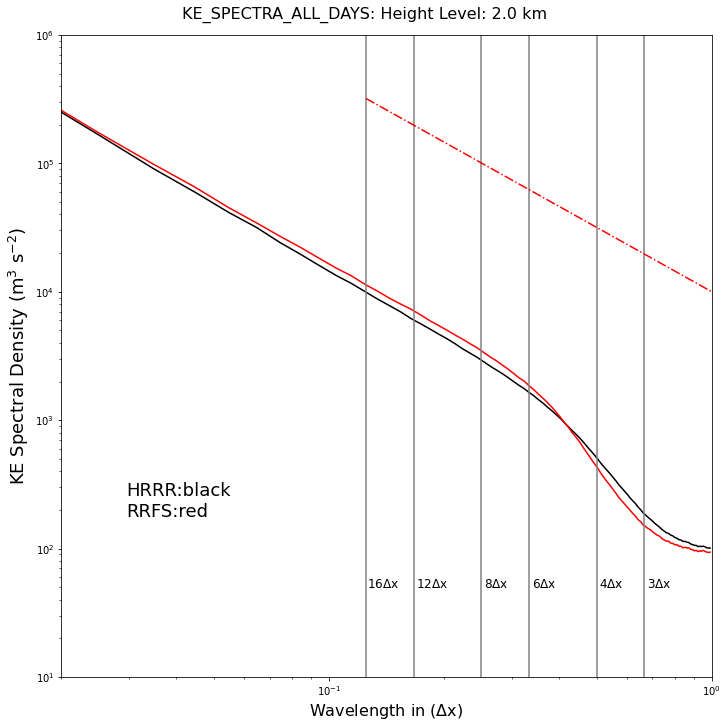

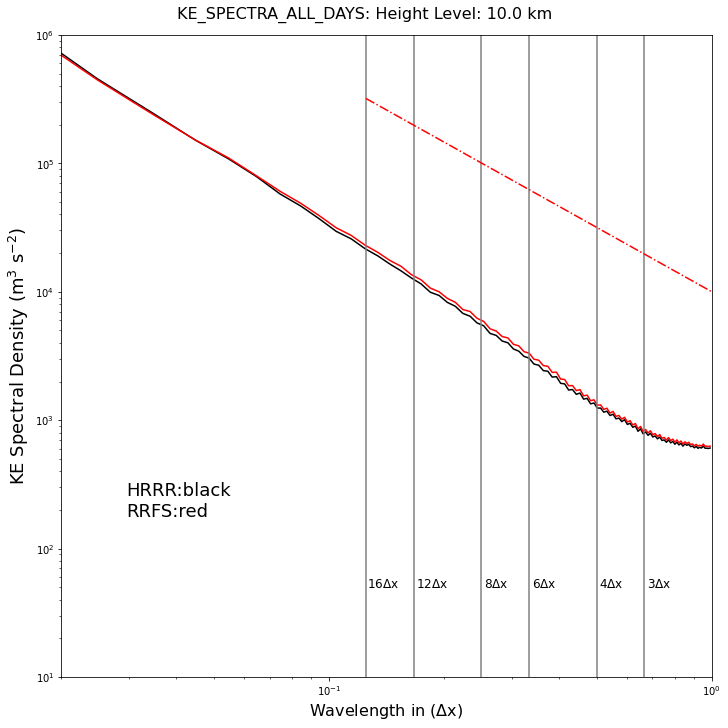

In [80]:
import matplotlib.ticker as mticker

analysis_levels  = [4, 34]

def update_ticks(x, pos):
    if x != 0.0:
        return "%2.1f" % (2.0/x)
    else:
        return r'$\infty$'

in_dir  = "/work/wicker/ECONUS"
out_dir = "/work/wicker/CAM_analysis_tools/2022_spectra"
case_days = ["2022050400",
            "2022051200",
            "2022051400",
            "2022051500",
            "2022051900",
            "2022052300",
            "2022052400",
            "2022052700",
            "2022053000",
            "2022060700"]

ncases = len(case_days)

avg_grid = 0.005 + 0.985* np.linspace(0.0, 1.0, num=100, endpoint=True)

ret_data =  {"HRRR":[], 
             "RRFS":[]}

avg_data = {"HRRR":np.zeros((ncases,avg_grid.shape[0],)), 
            "RRFS":np.zeros((ncases,avg_grid.shape[0],))}

func = get_spectra2D_RAD
dtrend = False
axis = None

delta = False

suffix_names = ["HRRR","RRFS"]
region = "ECONUS"
#------------------------------------------------------------------------------------
#

print("\n====> Begin processing runs\n")

for k in analysis_levels:
    for n, day in enumerate(case_days):
        for run in suffix_names:

            print("\n----> Processing run: %s for day:  %s \n" % (run, day))
            
            myfile  = str(os.path.join(in_dir, "%s_%s_%s.nc" % (day, run, region)))
            print("          %s\n" % myfile)

            # Open data set

            data = xr.open_dataset(myfile)
            
            zlevels = data.z
            
            # Loop over the analy_klevels to create multiple plots

            # these five levels are averaged together

            klevels = [k-1, k, k+1]

            # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

            data_u = np.nan_to_num(data.u_interp.isel(nz=klevels).values).astype('float64')
            data_v = np.nan_to_num(data.v_interp.isel(nz=klevels).values).astype('float64')

            # Compute spectra...

            ret = get_spectraND(data_u, varray=data_v, func = func, detrend=dtrend)

            ret_data[run].append(ret)

            avg_data[run][n][:] = np.interp(avg_grid, ret[2], ret[1])
            
            data.close()

# Now post the runs....

    legend='HRRR:black\nRRFS:red'

    avg_hrrr = avg_data['HRRR'].mean(axis=0)
    avg_rrfs = avg_data['RRFS'].mean(axis=0)

    fig, axes = plt.subplots(1, 1, constrained_layout=True,figsize=(10,10))

    if delta:
        delta_rrfs = avg_rrfs[12]-avg_hrrr[12]
        axes.loglog(avg_grid, avg_hrrr+delta_rrfs,  color='black')
    else:
        axes.loglog(avg_grid, avg_hrrr,  color='black')
        
    axes.loglog(avg_grid, avg_rrfs, color='red')
    
    axes.set_xlim(2.0/avg_grid.shape[0], 1.0)

    axes.annotate("%s" % legend, xy=(0.10, 0.25), xycoords='axes fraction', color='k',fontsize=18)
    axes.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

    ylim = [1.0e1,1.0e6]

    axes.set_ylim(ylim[0], ylim[1])

    ylabel = 5. * ylim[0]

    xoffset = [0.01, 0.0075, 0.005, 0.0035, 0.0025, 0.001]

    for n, w in enumerate([3.0, 4.0, 6.0, 8.0, 12.0, 16.0]):
        axes.axvline(x = (2.0/w), color = 'grey', label = 'axvline - full height')  
        axes.annotate(r"%d$\Delta$x" % w, xy=(2.0/w + xoffset[n], ylabel), xycoords='data', color='k',fontsize=12)
        
    xpt = [2.0/16.,2.0/2.0]
    dlnx = np.log(xpt[1]) - np.log(xpt[0])
    y1   = ylim[1]/(100.)
    y0   = np.exp(np.log(y1) + 5./3. * dlnx)
    ypt  = [y0,y1]
    axes.loglog(xpt, ypt, color='red',linestyle='-.',label='k$^{-5/3}$')

    axes.set_xlabel(r"Wavelength in ($\Delta$x)", fontsize=16)
    axes.set_ylabel(r"KE Spectral Density (m$^3$ s$^{-2}$)", fontsize=18)

    plt.suptitle("KE_SPECTRA_ALL_DAYS: Height Level: %3.1f km" % (zlevels[k]/1000.), fontsize=16)

    plt.savefig("%s/%s_%3.1fkm.png" % (out_dir, 'KE_SPECTRA_ALL', zlevels[k]/1000.),bbox_inches='tight',dpi=300)
    
    